# Modelo RANDON FOREST

In [18]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

## Cargamos los datos de entrada del archivo .csv Train

In [19]:
# Load data
train = pd.read_csv('../data/Processed/train_processed.csv', sep=',')
df_train=pd.DataFrame(train)
df_train

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,...,1,0,0,1,0,0,0,0,0,0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,...,0,1,0,0,0,0,0,1,0,0
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,...,0,1,1,0,0,0,0,0,0,0
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,...,0,1,1,0,0,0,0,0,0,0
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,...,1,0,1,0,0,0,0,0,0,0
8689,9278_01,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,...,0,1,0,0,0,0,0,0,1,0
8690,9279_01,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,...,0,1,0,0,0,0,0,0,1,0
8691,9280_01,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,...,0,1,0,0,0,0,1,0,0,0


In [20]:
# Definimos las variables que me guardan los datos a entrenar separados del target 
y=df_train['Transported']

X=df_train[['PassengerId', 'CryoSleep', 'Age','VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Earth','Europa','Mars','Cabin_num','Cabin_Deck_A','Cabin_Deck_B','Cabin_Deck_C','Cabin_Deck_D',
       'Cabin_Deck_E','Cabin_Deck_F','Cabin_Deck_G','Cabin_Deck_T','Cabin_Side_P','Cabin_Side_S']]

In [21]:
#Separamos los datos 70% Train, 30% Test (Es la proporcion pedida en Kaggel)
from sklearn.model_selection import train_test_split

classes = list(df_train.loc[:, 'PassengerId':].columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print(f"X_train: {X_train.shape}\ty_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

X_train: (6085, 23)	y_train: (6085,)
X_test: (2608, 23)	y_test: (2608,)


### (Optional) Random forest without parameter tuning

In [22]:
# y aqui ya aplicamos el max_deph recomendado, que es 8 y efectivamente da el mayor Score posible :)
tuned_tree = DecisionTreeClassifier(max_depth=9, splitter='best', criterion= 'entropy', max_leaf_nodes=80, class_weight='balanced',random_state=17)
tuned_tree.fit(X_train, y_train)
tuned_tree_predictions = tuned_tree.predict(X_test)
print("Cross Validation Score (max_depth=11)",accuracy_score(y_test, tuned_tree_predictions))

Cross Validation Score (max_depth=11) 0.7917944785276073


### (Optional) Random forest with parameter tuning

In [23]:
from sklearn.model_selection import GridSearchCV
forest_params = {'max_depth': range(1, 16),
                 'max_features': range(1, 200, 5)}

locally_best_forest = GridSearchCV(RandomForestClassifier(n_estimators=10, random_state=17,n_jobs=4), forest_params, cv=3, verbose=1, n_jobs=4)

locally_best_forest.fit(X_train, y_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1575 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1575 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-package

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=4,
                                              random_state=17),
             n_jobs=4,
             param_grid={'max_depth': range(1, 16),
                         'max_features': range(1, 200, 5)},
             verbose=1)

In [24]:
print("Best params:", locally_best_forest.best_params_)
print("Best cross validaton score", locally_best_forest.best_score_)

Best params: {'max_depth': 7, 'max_features': 6}
Best cross validaton score 0.790797003605511


In [25]:
tuned_forest_predictions = locally_best_forest.predict(X_test) 
print('MODELO RANDOM FOREST')
print("ACCURACY TRAIN:",accuracy_score(y_test,tuned_forest_predictions))

MODELO RANDOM FOREST
ACCURACY TRAIN: 0.8086656441717791


### Random forest

In [44]:
# Creamos el modelo

rf = RandomForestClassifier(n_estimators=100, random_state=17, min_samples_leaf=1, max_depth=7, max_features=5, bootstrap= True, n_jobs=-1)
rf.fit(X_train, y_train)
forest_predictions=rf.predict(X_test)

In [45]:
#Hacemos la prediccion y mostramos el resultado
print('MODELO RANDOM FOREST')
print("Training Score: {}".format(rf.score(X_train, y_train)))
print("Test Score: {}".format(rf.score(X_test, y_test)))

MODELO RANDOM FOREST
Training Score: 0.8210353327855382
Test Score: 0.8098159509202454


In [46]:
import sklearn.metrics as metrics
predictions = rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1044  252]
 [ 244 1068]]


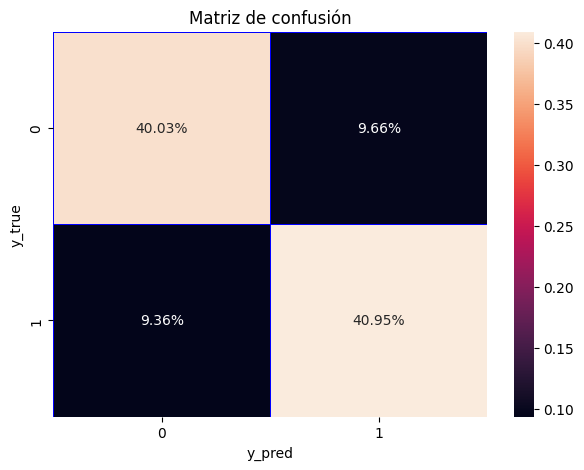

In [47]:
f, ax=plt.subplots(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, linewidths=0.5, fmt='.2%', linecolor="blue")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Matriz de confusión")
plt.show()

In [48]:
def graph_feat(model,X):
    feat_impor = pd.DataFrame(model.feature_importances_)
    fimport = feat_impor.set_axis(X.columns, axis='index')
    fimport.sort_values(by=[0], ascending= False, inplace = True)
    fig = plt.figure(figsize=(12, 8))
    plt.barh(fimport.index, fimport[0])
    plt.xlabel('Feature Importances')
    plt.xticks(rotation = 90)
    plt.ylabel('Feature Labels')
    plt.title('Comparacion de la importancia de las variables')
    return plt.show()


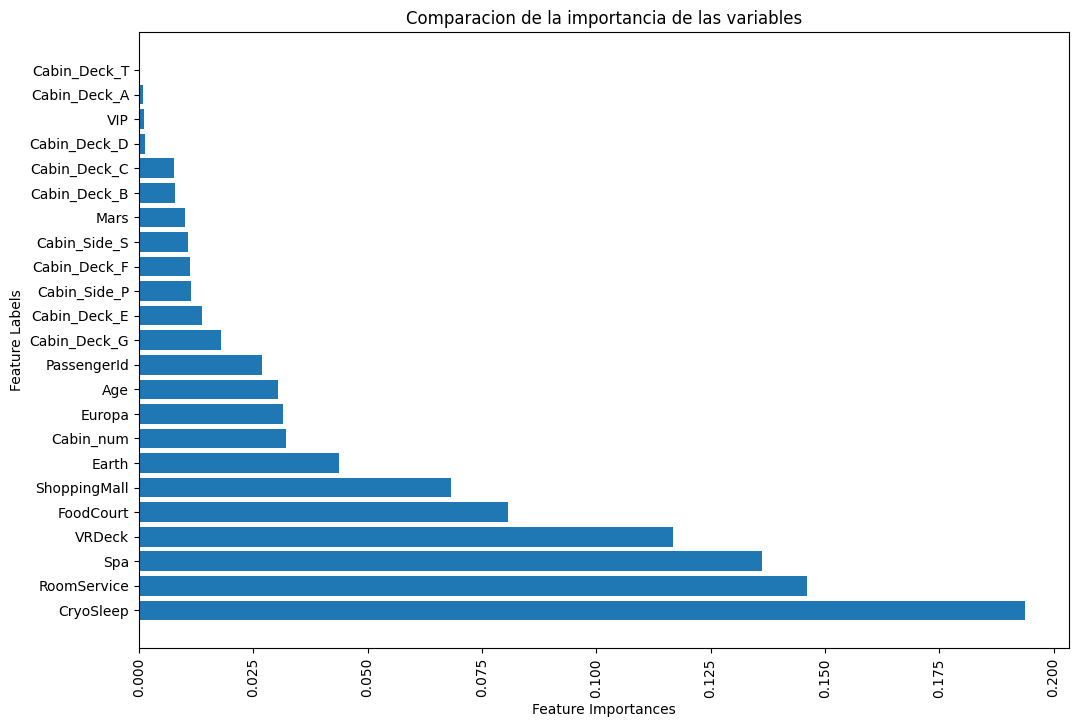

In [49]:
graph_feat(rf, X_train)

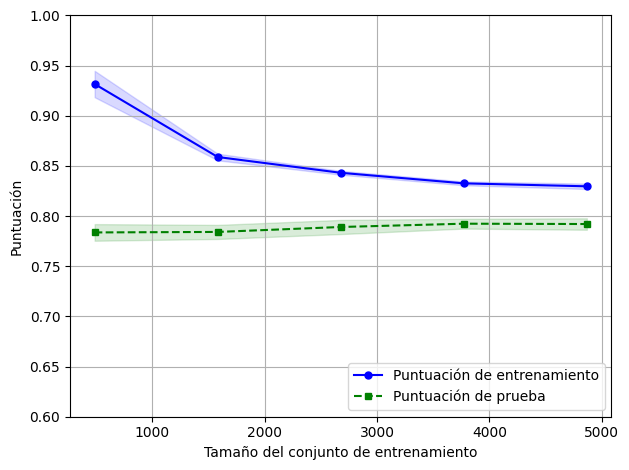

In [50]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Crear modelo
model = rf

# Crear conjunto de entrenamiento y prueba
X = X_train
y = y_train

# Calcular puntuaciones de entrenamiento y prueba para diferentes tamaños de conjunto de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Calcular media y desviación típica de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Crear gráfico
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Puntuación de entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Puntuación de prueba')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Puntuación')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.tight_layout()
plt.show()


## Cargamos los datos de entrada del archivo .csv Test

In [51]:
# Load data
test = pd.read_csv('../data/Processed/test_processed.csv', sep=',')
df_test=pd.DataFrame(test)
df_test

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,...,0,1,0,0,0,0,0,1,0,0
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,1,0,0,0,0,0
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,...,0,1,0,0,1,0,0,0,0,0
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
4273,9269_01,0,42.0,0,0.0,847.0,17.0,10.0,144.0,1,...,1,0,0,0,0,0,0,0,1,0
4274,9271_01,1,26.0,0,0.0,0.0,0.0,0.0,0.0,0,...,1,0,0,0,0,1,0,0,0,0
4275,9273_01,0,26.0,0,0.0,2680.0,0.0,0.0,523.0,0,...,1,0,0,0,0,1,0,0,0,0


In [52]:
prediccion_test = pd.DataFrame(rf.predict(df_test))
prediccion_test['PassengerId'] =df_test['PassengerId']
prediccion_test = prediccion_test.rename(columns = {0:'Transported'})
prediccion_test = prediccion_test[['PassengerId','Transported']]
prediccion_test.to_csv('../data/output/Random_Forest.csv', index=False)
prediccion_test

c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
